# Capstone Project - The Battle of the Neighborhoods (Week 2)
### Applied Data Science Capstone by IBM/Coursera


## Table of contents
* [Introduction: Business Problem](#introduction)
* [Data](#data)
* [Methodology](#methodology)
* [Analysis](#analysis)
* [Results and Discussion](#results)
* [Conclusion](#conclusion)

In [2]:
# library to handle data in a vectorized manner
import numpy as np
import time
# library for data analsysis
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# library to handle JSON files
import json 

# library to handle requests
import requests 
# tranform JSON file into a pandas dataframe
from pandas.io.json import json_normalize 

# convert an address into latitude and longitude values
from geopy.geocoders import Nominatim  

# uncomment this line if you haven't completed the Foursquare API lab
!conda install -c conda-forge folium=0.5.0 --yes  

# map rendering library
import folium

# plotting library
import matplotlib.pyplot as plt 
# backend for rendering plots within the browser
%matplotlib inline 

from sklearn.cluster import KMeans 


print('Libraries imported.')

Solving environment: ...working... done

# All requested packages already installed.

Libraries imported.


## Introduction: Business Problem <a name="introduction"></a>

### Description of  the business problem and a discussion of the background.


A friend of mine wanted to start a new eatery delivery in Doha, Qatar.   He wanted to spot the best area where he can start his business which can give his better oppurtunities to grow his business.  The idea is to start his business in a location where he can have access to most of the the restaurants with least distance from his delivery centre and he also wanted to know how many delivery centres will be required so that none of the restaurant is more than an optimal distance, so that his delivery guys can reach any of the restuarant in a min required time without any delay.  Doha proper city has an area of 132 km/Sq where most of the main restaurants are located.

## Data <a name="data"></a>

### Description of the Data:¶

The following data is required to  answer the issues of the problem:

List of all restaurants  in Doha with below data :-
- ID
- Name
- Address
- landmark if any
- latitude
- longitude.

### How the data will be used to solve the problem

The data will be used as follows:
- The data will be used to find a centre based on the clusters of the restaurents.
- Since the main city area is 132 Km/Sq we will consider best optimal radius to reach all parts of Doha.

In [3]:
# Shenton Way, District 01, Singapore
address = 'Doha, Qatar'
geolocator = Nominatim(user_agent="foursquare_agent")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Doha is {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Doha is 25.2856329, 51.5264162.


In [4]:
neighborhood_latitude=latitude
neighborhood_longitude=longitude

CLIENT_ID = 'WTUBBNAE25SZR2DKVB0HSSV0UIQYE5MBKS45H1FHV1LVOBGZ' # your Foursquare ID
CLIENT_SECRET = 'DE3F2DGXRHKHJOXYA2DIBZNP023DUBUZOFP4DZQZSBNRCZ1G' # your Foursquare Secret
ACCESS_TOKEN = '1RRPRNZE55WZUODPP2MG1BRILZIUZ3PZHAGDXTXW5GZURDIZ' # your FourSquare Access Token
VERSION = '20180604'
LIMIT = 200 # limit of number of venues returned by Foursquare API
radius = 12000 # define radius
search_query = 'Restaurant'

# create URL
url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&oauth_token={}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude,ACCESS_TOKEN, VERSION, search_query, radius, LIMIT)

url # display URL

'https://api.foursquare.com/v2/venues/search?client_id=WTUBBNAE25SZR2DKVB0HSSV0UIQYE5MBKS45H1FHV1LVOBGZ&client_secret=DE3F2DGXRHKHJOXYA2DIBZNP023DUBUZOFP4DZQZSBNRCZ1G&ll=25.2856329,51.5264162&oauth_token=1RRPRNZE55WZUODPP2MG1BRILZIUZ3PZHAGDXTXW5GZURDIZ&v=20180604&query=Restaurant&radius=12000&limit=200'

In [5]:
results = requests.get(url).json()
#results

In [6]:
# assign relevant part of JSON to venues
venues = results['response']['venues']
#venues
# tranform venues into a dataframe
dataframe = json_normalize(venues)
dataframe.head()

<ipython-input-6-b2247b82aca9>:5: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  dataframe = json_normalize(venues)


,id,name,categories,referralId,hasPerk,location.address,location.lat,location.lng,location.labeledLatLngs,location.distance,location.cc,location.city,location.state,location.country,location.formattedAddress,location.crossStreet,location.postalCode,location.neighborhood,venuePage.id
0,514d83a9e4b0fb270fbdf0e0,Al-Hamra Restaurant (مطعم الحمراء),"[{'id': '4bf58dd8d48988d115941735', 'name': 'M...",v-1627400223,False,Alrayyan Road,25.288531,51.521745,"[{'label': 'display', 'lat': 25.28853116475642...",570,QA,الدوحة,الدوحة,قطر,"[Alrayyan Road, الدوحة]",NaN,NaN,NaN,NaN
1,55c39c6c498ec87098f437a5,Punjab Restaurant (مطعم بنجاب),"[{'id': '52e81612bcbc57f1066b79f8', 'name': 'P...",v-1627400223,False,NaN,25.283566,51.523511,"[{'label': 'display', 'lat': 25.28356552845029...",372,QA,NaN,NaN,قطر,NaN,NaN,NaN,NaN,NaN
2,4cab505876d3a09310162b6b,Bandar Aden Restaurant (مطعم بندر عدن للمأكولا...,"[{'id': '4bf58dd8d48988d115941735', 'name': 'M...",v-1627400223,False,Souq Waqif,25.289614,51.532939,"[{'label': 'display', 'lat': 25.28961363564512...",792,QA,الدوحة,الدوحة,قطر,"[Souq Waqif, الدوحة]",NaN,NaN,NaN,NaN
3,539b441f498e78925a2deb36,Shebestan Palace Restaurant (مطعم قصر شبستان),"[{'id': '4bf58dd8d48988d1c4941735', 'name': 'R...",v-1627400223,False,NaN,25.287949,51.533893,"[{'label': 'display', 'lat': 25.28794946653172...",795,QA,NaN,NaN,قطر,NaN,NaN,NaN,NaN,NaN
4,53d7d0e8498eb348d50d3016,AlMurjan Restaurant,"[{'id': '58daa1558bbb0b01f18ec1cd', 'name': 'L...",v-1627400223,False,NaN,25.286176,51.531567,"[{'label': 'display', 'lat': 25.2861764407817,...",522,QA,الدوحة,الدوحة,قطر,[الدوحة],NaN,NaN,NaN,NaN


In [7]:
# keep only columns that include venue name, and anything that is associated with location
filtered_columns = ['name', 'categories'] + [col for col in dataframe.columns if col.startswith('location.')] + ['id']
dataframe_filtered = dataframe.loc[:, filtered_columns]

# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

# filter the category for each row
dataframe_filtered['categories'] = dataframe_filtered.apply(get_category_type, axis=1)

# clean column names by keeping only last term
dataframe_filtered.columns = [column.split('.')[-1] for column in dataframe_filtered.columns]

dataframe_filtered

,name,categories,address,lat,lng,labeledLatLngs,distance,cc,city,state,country,formattedAddress,crossStreet,postalCode,neighborhood,id
0,Al-Hamra Restaurant (مطعم الحمراء),Middle Eastern Restaurant,Alrayyan Road,25.288531,51.521745,"[{'label': 'display', 'lat': 25.28853116475642...",570,QA,الدوحة,الدوحة,قطر,"[Alrayyan Road, الدوحة]",NaN,NaN,NaN,514d83a9e4b0fb270fbdf0e0
1,Punjab Restaurant (مطعم بنجاب),Pakistani Restaurant,NaN,25.283566,51.523511,"[{'label': 'display', 'lat': 25.28356552845029...",372,QA,NaN,NaN,قطر,NaN,NaN,NaN,NaN,55c39c6c498ec87098f437a5
2,Bandar Aden Restaurant (مطعم بندر عدن للمأكولا...,Middle Eastern Restaurant,Souq Waqif,25.289614,51.532939,"[{'label': 'display', 'lat': 25.28961363564512...",792,QA,الدوحة,الدوحة,قطر,"[Souq Waqif, الدوحة]",NaN,NaN,NaN,4cab505876d3a09310162b6b
3,Shebestan Palace Restaurant (مطعم قصر شبستان),Restaurant,NaN,25.287949,51.533893,"[{'label': 'display', 'lat': 25.28794946653172...",795,QA,NaN,NaN,قطر,NaN,NaN,NaN,NaN,539b441f498e78925a2deb36
4,AlMurjan Restaurant,Lebanese Restaurant,NaN,25.286176,51.531567,"[{'label': 'display', 'lat': 25.2861764407817,...",522,QA,الدوحة,الدوحة,قطر,[الدوحة],NaN,NaN,NaN,53d7d0e8498eb348d50d3016
5,Al Adhamiyah Iraqi Restaurant (مطعم الأعظمية ا...,Middle Eastern Restaurant,Souq Wakif,25.286278,51.531792,"[{'label': 'display', 'lat': 25.28627783672628...",545,QA,الدوحة,الدوحة,قطر,"[Souq Wakif, الدوحة]",NaN,NaN,NaN,4cb73a61589f236ada423d3d
6,Sanaa Restaurant,Middle Eastern Restaurant,Souq Waqif,25.286240,51.532534,"[{'label': 'display', 'lat': 25.28624047738480...",619,QA,الدوحة,الدوحة,قطر,"[Souq Waqif, الدوحة]",NaN,NaN,NaN,4d6d360ecb7a8cfa4efa5b79
7,Shebestan Palace Restaurant,Middle Eastern Restaurant,Al Sadd,25.280948,51.504165,"[{'label': 'display', 'lat': 25.28094756505888...",2299,QA,الدوحة,الدوحة,قطر,"[Al Sadd (Al Sadd St), الدوحة]",Al Sadd St,NaN,NaN,4eabe3d861af01ea2af7c2a6
8,Tawash Restaurant (مطعم طواش),Middle Eastern Restaurant,Souq Waqif,25.286826,51.532692,"[{'label': 'display', 'lat': 25.28682581526963...",645,QA,الدوحة,الدوحة,قطر,"[Souq Waqif, الدوحة]",NaN,NaN,NaN,4f72edd1e4b06e8c1d9aed14
9,Aloosh Iraqi Restaurant (مطعم علوش العراقي),Middle Eastern Restaurant,Souq Waqif,25.288620,51.532085,"[{'label': 'display', 'lat': 25.28862, 'lng': ...",660,QA,الدوحة,الدوحة,قطر,"[Souq Waqif, الدوحة]",NaN,NaN,NaN,5a9987c54940bc2ab2a2f15b


## Map of Doha with all restaurants within a radius of 12Kms. 

In [8]:
# dataframe_filtered.name
venues_map = folium.Map(location=[latitude, longitude], zoom_start=13) # generate map centred around the Conrad Hotel

# add a red circle marker to represent Doha
folium.CircleMarker(
    [latitude, longitude],
    radius=10,
    color='red',
    popup='Doha Centre',
    fill = True,
    fill_color = 'red',
    fill_opacity = 0.6
).add_to(venues_map)

# add the restaurants as blue circle markers
for lat, lng, label in zip(dataframe_filtered.lat, dataframe_filtered.lng, dataframe_filtered.categories):
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        color='blue',
        popup=label,
        fill = True,
        fill_color='blue',
        fill_opacity=0.6
    ).add_to(venues_map)

# display map
venues_map

In [9]:
#x1 = dataframe_filtered.lat
#x2 = dataframe_filtered.lng
#print(x1,x2)
dataframe_filtered.dropna(axis=0,how='any',subset=['lat','lng'],inplace=True)

In [10]:
X=dataframe_filtered.loc[:,['id','lat','lng']]

In [11]:
X.head(10)

,id,lat,lng
0,514d83a9e4b0fb270fbdf0e0,25.288531,51.521745
1,55c39c6c498ec87098f437a5,25.283566,51.523511
2,4cab505876d3a09310162b6b,25.289614,51.532939
3,539b441f498e78925a2deb36,25.287949,51.533893
4,53d7d0e8498eb348d50d3016,25.286176,51.531567
5,4cb73a61589f236ada423d3d,25.286278,51.531792
6,4d6d360ecb7a8cfa4efa5b79,25.286240,51.532534
7,4eabe3d861af01ea2af7c2a6,25.280948,51.504165
8,4f72edd1e4b06e8c1d9aed14,25.286826,51.532692
9,5a9987c54940bc2ab2a2f15b,25.288620,51.532085


## Methodology <a name="methodology"></a>

### Create an elbow curve to select the optimal number of clusters

K-means is somewhat naive - it clusters the data into k clusters, even if k is not the right number of clusters to use. When we come to clustering, it's hard to know how many clusters are optimal… In our dataset, how many clusters are optimal i.e. make sense, we don't want to guess now do we? Therefore, when using k-means clustering, we need a way to determine whether we are using the right number of clusters.

One method to validate the number of clusters is the elbow method. The idea of the elbow method is to run k-means clustering on the dataset for a range of values of k (say, k from 1 to 10), and for each value of k calculate the Sum of Squared Errors (SSE).

When K increases, the centroids are closer to the clusters centroids. The improvements will decline rapidly at some point, creating the elbow shape. That is the optimal value for K.

This might take a while.. Stretch a little.

In [12]:
K_clusters = range(1,10)

kmeans = [KMeans(n_clusters=i) for i in K_clusters]

Y_axis = dataframe_filtered[['lat']]
X_axis = dataframe_filtered[['lng']]

score = [kmeans[i].fit(Y_axis).score(Y_axis) for i in range(len(kmeans))]

C:\Users\m.joseph\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


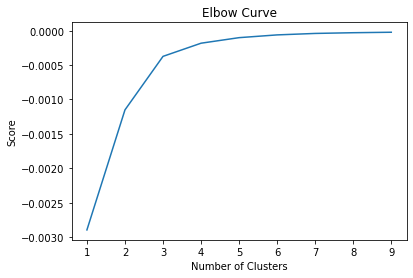

In [13]:
plt.plot(K_clusters, score)
plt.xlabel('Number of Clusters')

plt.ylabel('Score')

plt.title('Elbow Curve')

plt.show()

##  Analysis <a name="analysis"></a>

When we graph the plot, we see that the graph levels off slowly after 3 clusters. This implies that addition of more clusters will not help us that much.

 ## Clustering using K-Means and Assigning Clusters to our Data

In [14]:
kmeans = KMeans(n_clusters = 3, init ='k-means++')
kmeans.fit(X[X.columns[1:3]]) # Compute k-means clustering. # Compute k-means clustering.

X['cluster_label'] = kmeans.fit_predict(X[X.columns[1:3]])

centers = kmeans.cluster_centers_ # Coordinates of cluster centers.

labels = kmeans.predict(X[X.columns[1:3]]) # Labels of each point

X.head(10)

,id,lat,lng,cluster_label
0,514d83a9e4b0fb270fbdf0e0,25.288531,51.521745,1
1,55c39c6c498ec87098f437a5,25.283566,51.523511,1
2,4cab505876d3a09310162b6b,25.289614,51.532939,1
3,539b441f498e78925a2deb36,25.287949,51.533893,1
4,53d7d0e8498eb348d50d3016,25.286176,51.531567,1
5,4cb73a61589f236ada423d3d,25.286278,51.531792,1
6,4d6d360ecb7a8cfa4efa5b79,25.286240,51.532534,1
7,4eabe3d861af01ea2af7c2a6,25.280948,51.504165,0
8,4f72edd1e4b06e8c1d9aed14,25.286826,51.532692,1
9,5a9987c54940bc2ab2a2f15b,25.288620,51.532085,1


## Visualise Results  <a name="results"></a>

Let's visualize the results by plotting the data colored by these labels. We will also plot the cluster centers as determined by the k-means estimator:

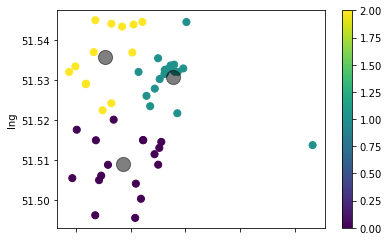

In [15]:
X.plot.scatter(x = 'lat', y = 'lng', c=labels, s=50, cmap='viridis')
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)

In [16]:
centers = kmeans.cluster_centers_
print(centers)

[[25.27862351 51.50900158]
 [25.28775884 51.53071735]
 [25.27524739 51.53579583]]


## Conclusion  <a name="conclusion"></a>

From the elbow curve plot and k-means we can assume that the the best optimum number of delivery points required would be 3 to cover most of the restuarants in Doha. 